<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 133.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 153.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 138.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 130.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 145.9 MB/s eta 0:00:00


#### Step 1: Load the dataset


In [46]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




In [47]:
import numpy as np

age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': np.nan
}

df['Age_numeric'] = df['Age'].map(age_map)


In [48]:
df['Age_numeric'] = df['Age_numeric'].fillna(0).astype(int)


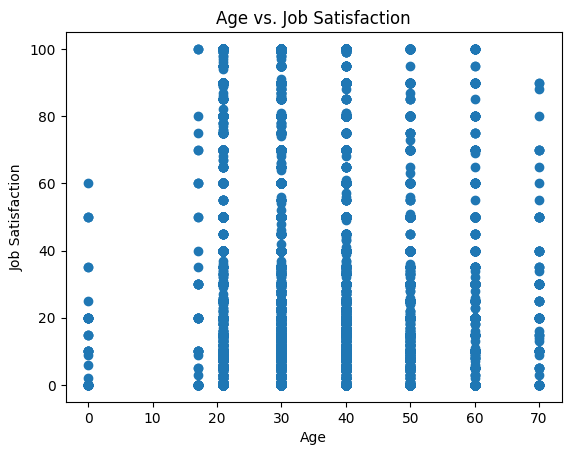

In [49]:
## Write your code here
import matplotlib.pyplot as plt
plt.scatter(df['Age_numeric'],df['JobSatPoints_6'])
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.title('Age vs. Job Satisfaction')
plt.show()

In [12]:
df[['Age_numeric','JobSatPoints_6']].corr()


,Age_numeric,JobSatPoints_6
Age_numeric,1.000000,-0.046857
JobSatPoints_6,-0.046857,1.000000


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


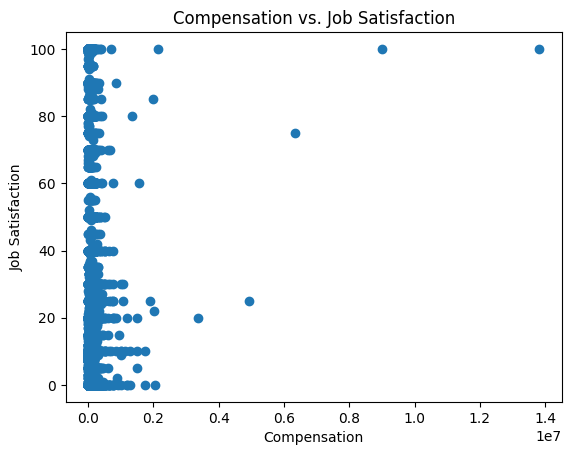

In [13]:
## Write your code here
plt.scatter(df['ConvertedCompYearly'],df['JobSatPoints_6'])
plt.xlabel('Compensation')
plt.ylabel('Job Satisfaction')
plt.title('Compensation vs. Job Satisfaction')
plt.show()

In [14]:
df[['ConvertedCompYearly','JobSatPoints_6']].corr()

,ConvertedCompYearly,JobSatPoints_6
ConvertedCompYearly,1.000000,-0.008518
JobSatPoints_6,-0.008518,1.000000


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


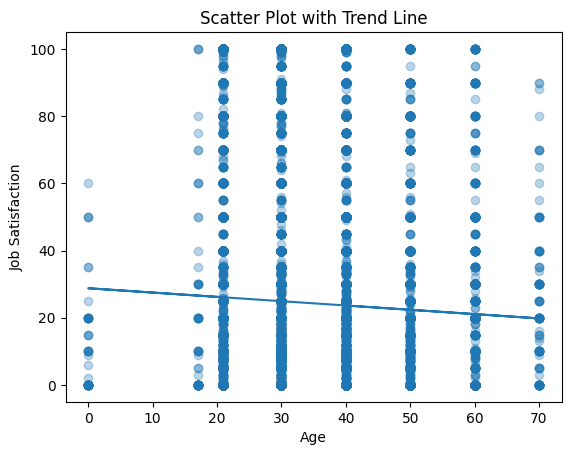

In [15]:
## Write your code here
df_plot = df.dropna(subset=['Age_numeric', 'JobSatPoints_6'])

x = df_plot['Age_numeric']
y = df_plot['JobSatPoints_6']

# Scatter plot
plt.scatter(x, y, alpha=0.3)

# Fit line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.xlabel("Age")
plt.ylabel("Job Satisfaction")
plt.title("Scatter Plot with Trend Line")

plt.show()

In [17]:
!pip install seaborn


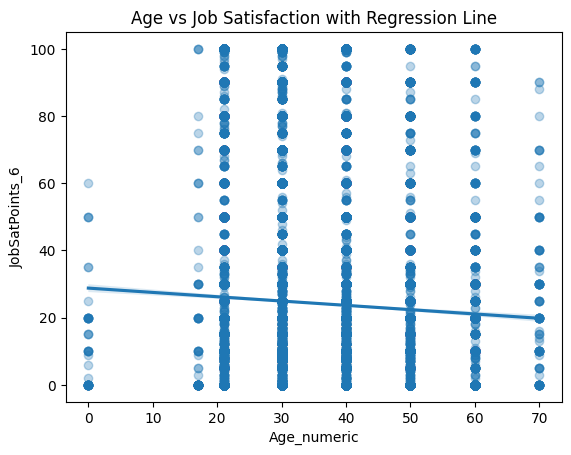

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='Age_numeric', y='JobSatPoints_6', data=df, scatter_kws={'alpha':0.3})

plt.title("Age vs Job Satisfaction with Regression Line")
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


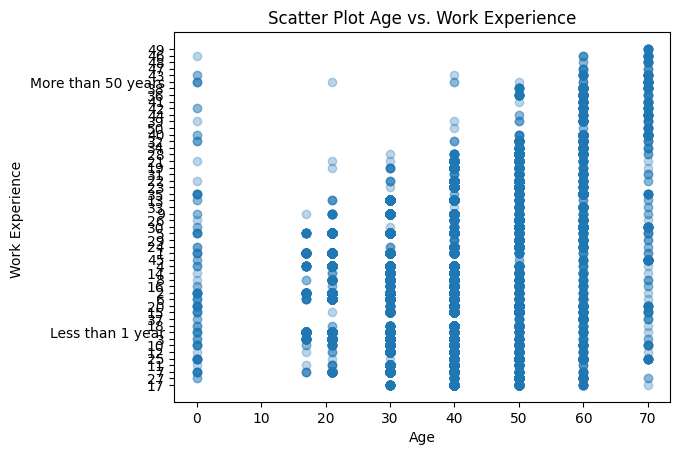

In [19]:
## Write your code here
df_plot = df.dropna(subset=['Age_numeric', 'YearsCodePro'])

x = df_plot['Age_numeric']
y = df_plot['YearsCodePro']

# Scatter plot
plt.scatter(x, y, alpha=0.3)

plt.xlabel("Age")
plt.ylabel("Work Experience ")
plt.title("Scatter Plot Age vs. Work Experience")

plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


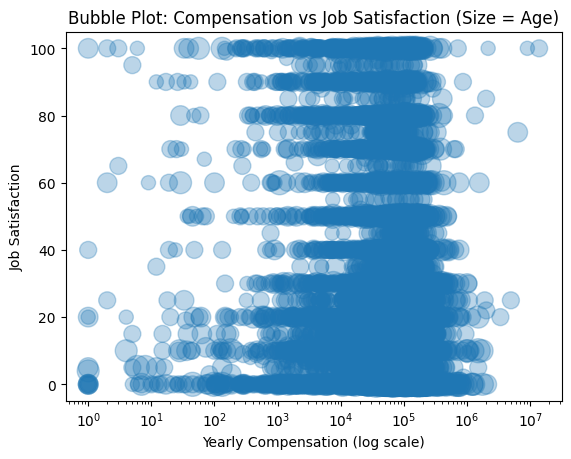

In [20]:
## Write your code here
import matplotlib.pyplot as plt

# Clean data
df_plot = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric'])

x = df_plot['ConvertedCompYearly']
y = df_plot['JobSatPoints_6']
sizes = df_plot['Age_numeric'] * 5   # scale for visibility

plt.scatter(x, y, s=sizes, alpha=0.3)

plt.xscale('log')  # VERY important for salary data

plt.xlabel("Yearly Compensation (log scale)")
plt.ylabel("Job Satisfaction")
plt.title("Bubble Plot: Compensation vs Job Satisfaction (Size = Age)")

plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [23]:
## Write your code here
df_languages = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6']).copy()

# Split multiple languages into separate rows
df_languages = df_languages.assign(Language=df_languages['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Remove extra spaces
df_languages['Language'] = df_languages['Language'].str.strip()


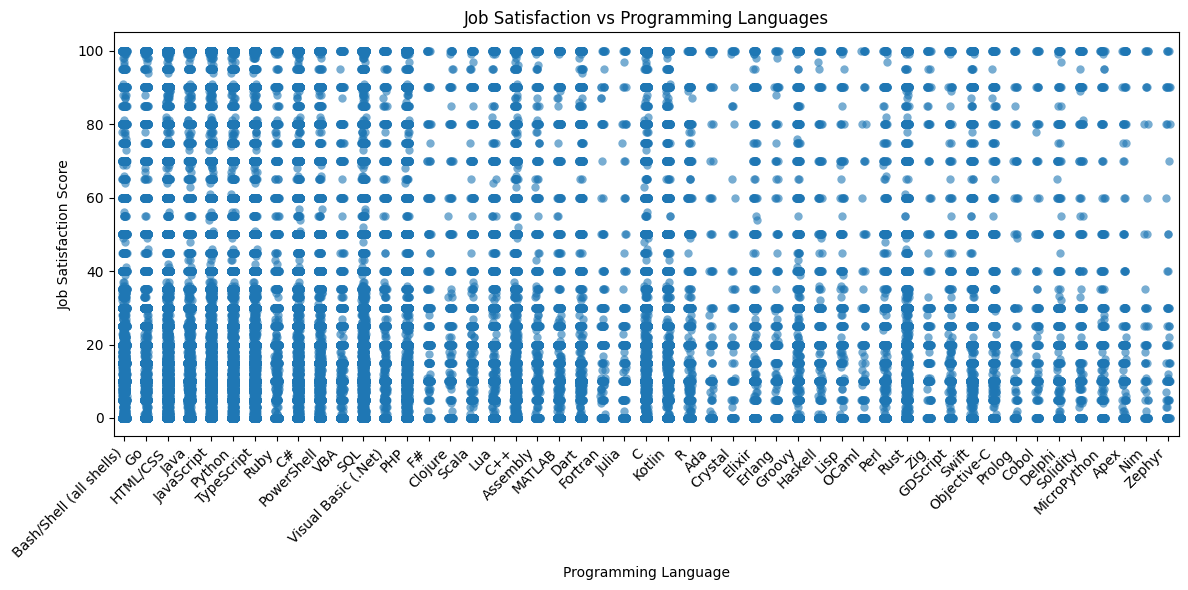

In [24]:
plt.figure(figsize=(12, 6))

# Using seaborn for easier visualization
sns.stripplot(
    x='Language', 
    y='JobSatPoints_6', 
    data=df_languages, 
    jitter=True,      # Spread points horizontally to avoid overlap
    alpha=0.6,        # Transparency
    size=6
)

plt.xticks(rotation=45, ha='right')
plt.title('Job Satisfaction vs Programming Languages')
plt.xlabel('Programming Language')
plt.ylabel('Job Satisfaction Score')
plt.tight_layout()
plt.show()


In [22]:
df['LanguageHaveWorkedWith'].head()

0                                                  NaN
1    Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2                                                   C#
3    C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...
4              C++;HTML/CSS;JavaScript;Lua;Python;Rust
Name: LanguageHaveWorkedWith, dtype: str

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


In [30]:
## Write your code here
# Drop rows with missing values in relevant columns
df_plot = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']).copy()

# Optional: filter out extreme compensation values to avoid skewed plot
df_plot = df_plot[df_plot['ConvertedCompYearly'] < 500000]  # Example: < $500k
# Use only the first employment type to simplify legend
df_plot['PrimaryEmployment'] = df_plot['Employment'].str.split(';').str[0]

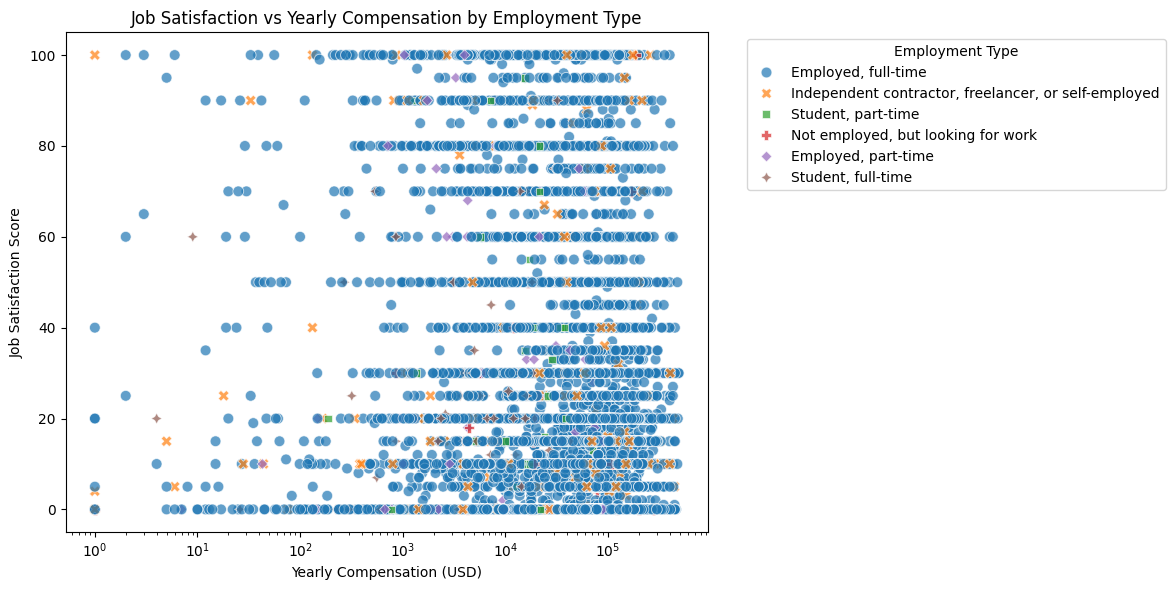

In [31]:
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df_plot,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='PrimaryEmployment',   # Different colors for employment types
    style='PrimaryEmployment', # Different markers for employment types
    alpha=0.7,
    s=60                       # size of points
)

plt.xscale('log')  # optional: log scale for skewed compensation
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Score')
plt.title('Job Satisfaction vs Yearly Compensation by Employment Type')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [50]:

age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': np.nan
}

df['Age'] = df['Age'].map(age_map)


In [51]:
## Write your code here
# Assuming your DataFrame is df
import pandas as pd

# Convert Age to numeric, invalid values become NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows with missing Age or YearsCodePro
df_clean = df[['Age', 'Country', 'YearsCodePro']].dropna()


In [52]:
df['Age'].head()

0    17.0
1    40.0
2    50.0
3    21.0
4    21.0
Name: Age, dtype: float64

In [57]:
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']

df_clean['AgeGroup'] = pd.cut(df_clean['Age'], bins=bins, labels=labels)


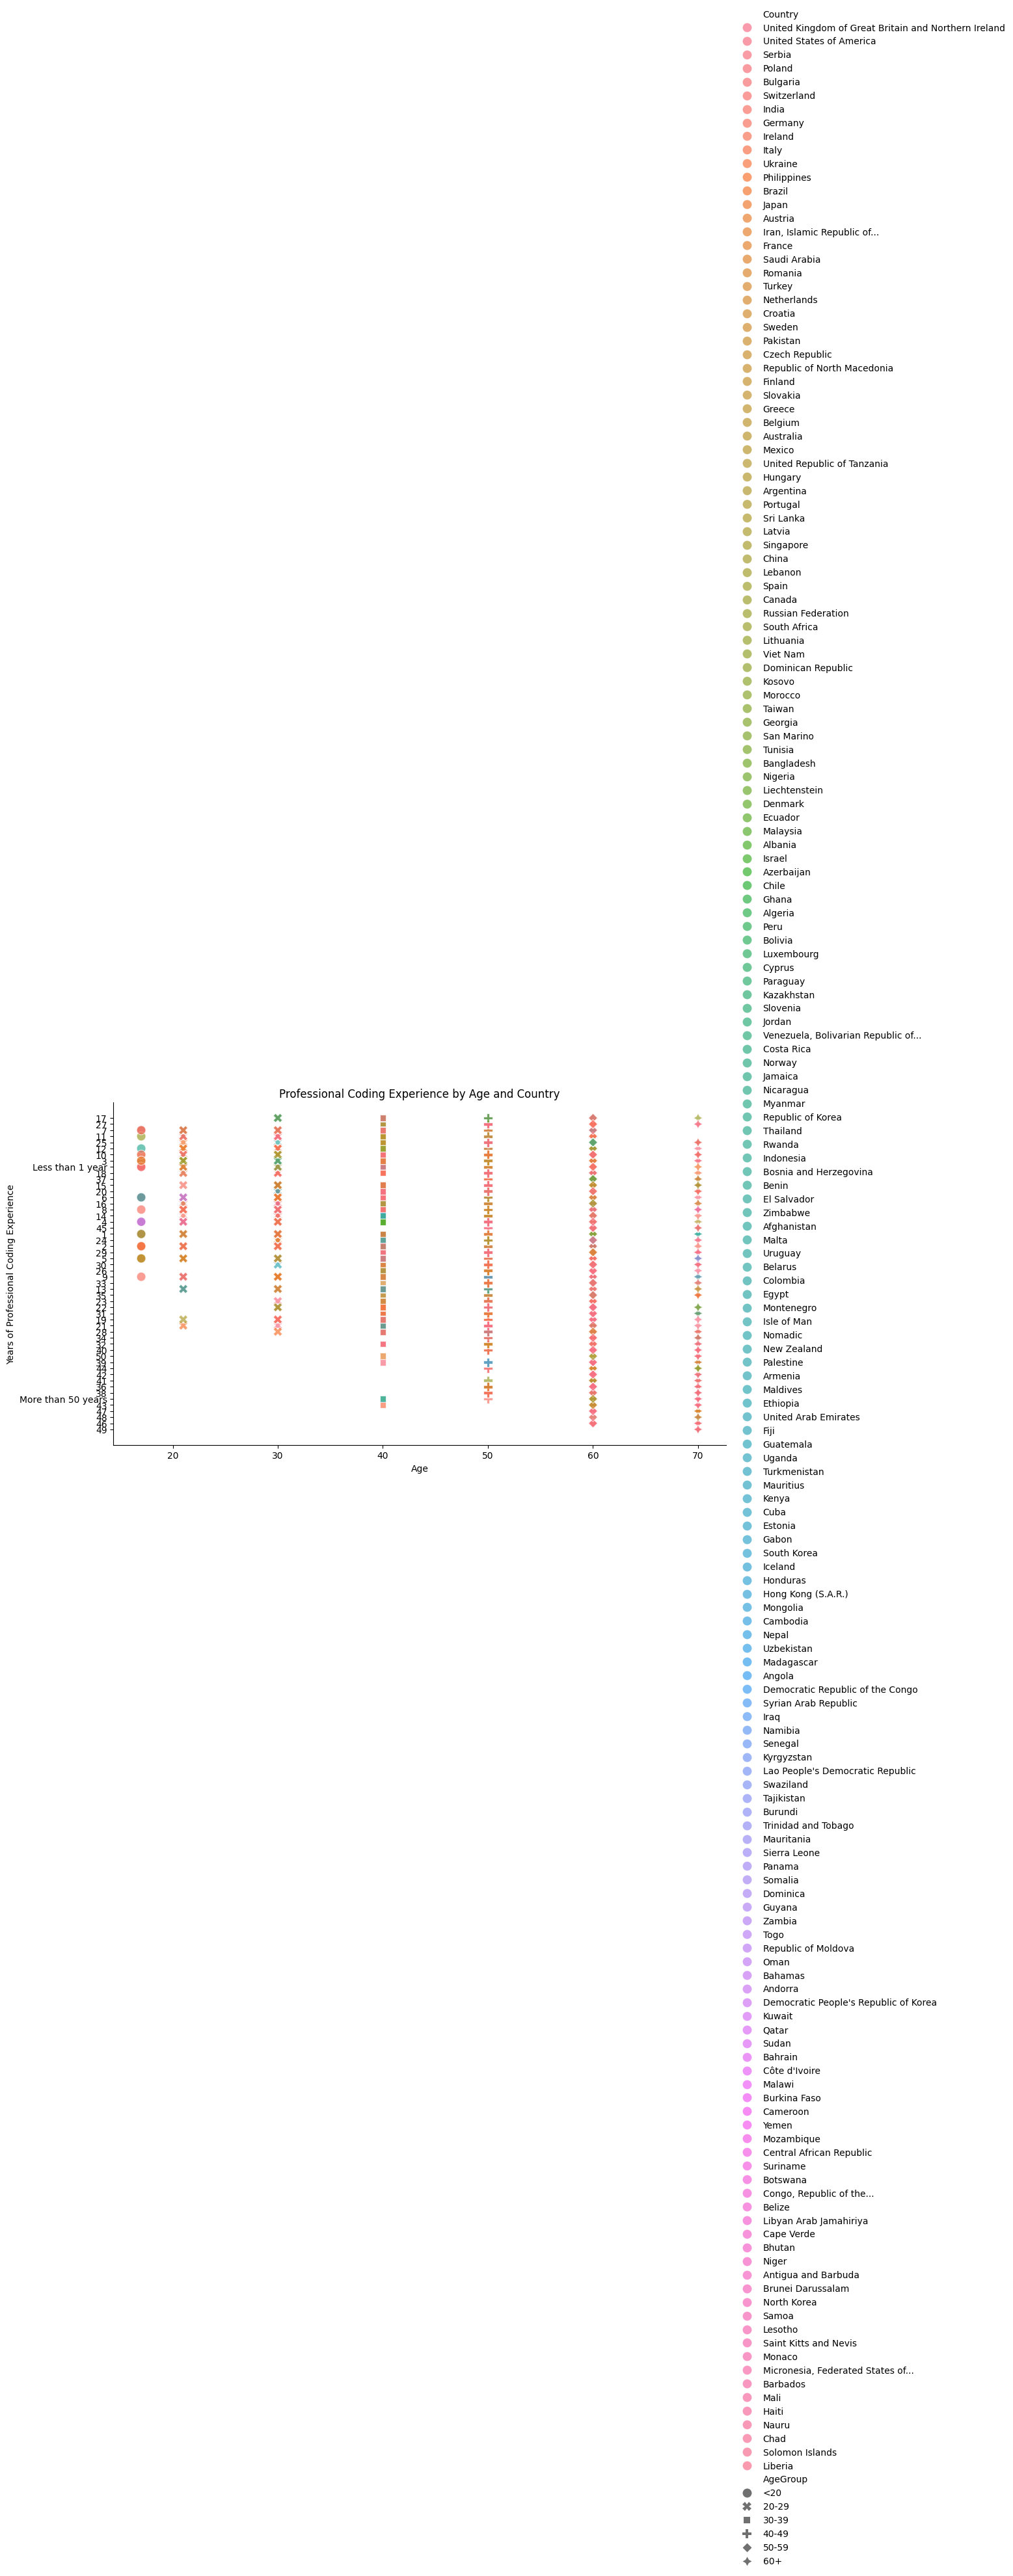

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use relplot to handle both markers and colors automatically
sns.relplot(
    data=df_clean,
    x='Age',
    y='YearsCodePro',
    hue='Country',        # different colors for countries
    style='AgeGroup',     # different markers for age groups
    kind='scatter',
    height=6,
    aspect=2,             # make it wider
    s=100,                # marker size
    alpha=0.7
)

plt.title('Professional Coding Experience by Age and Country')
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding Experience')
plt.show()



### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
